In [2]:
from concurrent.futures import ProcessPoolExecutor, as_completed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import powerlaw
from tqdm.notebook import tqdm
from ants.model import AntWorld
from ants.agent import Environment, Ant, Food, Home, Predator
from functools import reduce

### Phase transition exploration-exploitation?

In [3]:
height = 50
width = 50

random_move_probs = np.linspace(0.0, 1.0, 10)
trials_per_setting = 5

In [4]:
def run_many_simulations(prob):

    results = []
    # for prob in tqdm(random_move_probs, desc="Running simulations"):

    food_collected = []
    surviving_ants = []
    
    for _ in range(trials_per_setting):

        model = AntWorld(height=height, width=width, prob_random=prob, num_predators=0)
        model.run_model()

        food_collected.append(model.home.amount)
        surviving_ants.append(sum(1 for agent in model.schedule.agents if isinstance(agent, Ant)))
    
    avg_food_collected = np.mean(food_collected)
    sem_food_collected = np.std(food_collected) / np.sqrt(trials_per_setting)
    ci_lower_food = avg_food_collected - 1.96 * sem_food_collected
    ci_upper_food = avg_food_collected + 1.96 * sem_food_collected

    avg_surviving_ants = np.mean(surviving_ants)
    sem_surviving_ants = np.std(surviving_ants) / np.sqrt(trials_per_setting)
    ci_lower_ants = avg_surviving_ants - 1.96 * sem_surviving_ants
    ci_upper_ants = avg_surviving_ants + 1.96 * sem_surviving_ants

    results.append({
        'prob_random': prob,
        'avg_food_collected': avg_food_collected,
        'ci_lower_food': ci_lower_food,
        'ci_upper_food': ci_upper_food,
        'avg_surviving_ants': avg_surviving_ants,
        'ci_lower_ants': ci_lower_ants,
        'ci_upper_ants': ci_upper_ants
    })

    return results


In [5]:
random_move_probs = np.linspace(0.0, 1.0, 10)

with ProcessPoolExecutor(max_workers=10) as executor:
    futures = executor.map(run_many_simulations, random_move_probs)

results = list(futures)
results = reduce(lambda x, y: x + y, results)

Making WorldMaking WorldMaking WorldMaking WorldMaking WorldMaking WorldMaking WorldMaking WorldMaking World

Making World







Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World


## Plot food collected and surviving ants

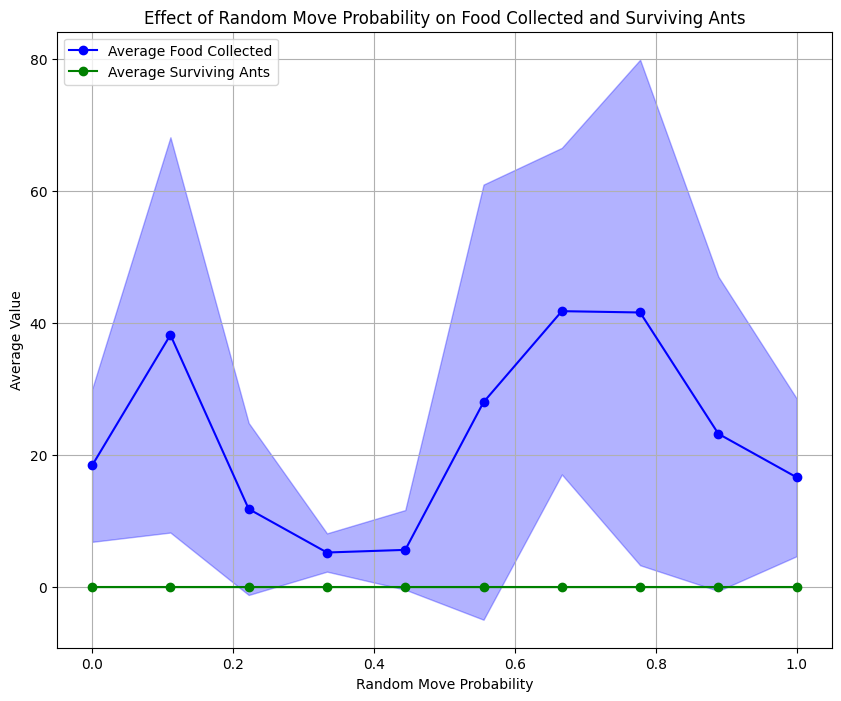

In [17]:
prob_random_values = [result['prob_random'] for result in results]
avg_food_collected_values = [result['avg_food_collected'] for result in results]
ci_lower_food_values = [result['ci_lower_food'] for result in results]
ci_upper_food_values = [result['ci_upper_food'] for result in results]

avg_surviving_ants_values = [result['avg_surviving_ants'] for result in results]
ci_lower_ants_values = [result['ci_lower_ants'] for result in results]
ci_upper_ants_values = [result['ci_upper_ants'] for result in results]

plt.figure(figsize=(10, 8))

plt.plot(prob_random_values, avg_food_collected_values, color='blue', marker='o', label='Average Food Collected')
plt.fill_between(prob_random_values, ci_lower_food_values, ci_upper_food_values, color='blue', alpha=0.3)

plt.plot(prob_random_values, avg_surviving_ants_values, color='green', marker='o', label='Average Surviving Ants')
plt.fill_between(prob_random_values, ci_lower_ants_values, ci_upper_ants_values, color='green', alpha=0.3)

plt.title('Effect of Random Move Probability on Food Collected and Surviving Ants')
plt.xlabel('Random Move Probability')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)

plt.show()

### Powerlaw distribution eaten ants

In [18]:
height = 50
width = 50
trials_per_setting = 20
num_predators = 10

In [19]:
def run_many_ants_eaten(iteration):
    ants_eaten_by_predators = []
    model = AntWorld(height=height, width=width, num_predators=num_predators)
    model.run_model()

    for agent in model.schedule.agents:
        if isinstance(agent, Predator):
            ants_eaten_by_predators.append(agent.ants_eaten)

    return ants_eaten_by_predators


with ProcessPoolExecutor(max_workers=10) as executor:
    futures = executor.map(run_many_ants_eaten, range(trials_per_setting))

results = list(futures)
ants_eaten_by_predator = reduce(lambda x, y: x + y, results)

Making WorldMaking WorldMaking WorldMaking WorldMaking WorldMaking World

Making WorldMaking WorldMaking WorldMaking World







Making WorldMaking World

Making World
Making World
Making World
Making World
Making World
Making World
Making World
Making World


## Distribution of ants eaten by predator

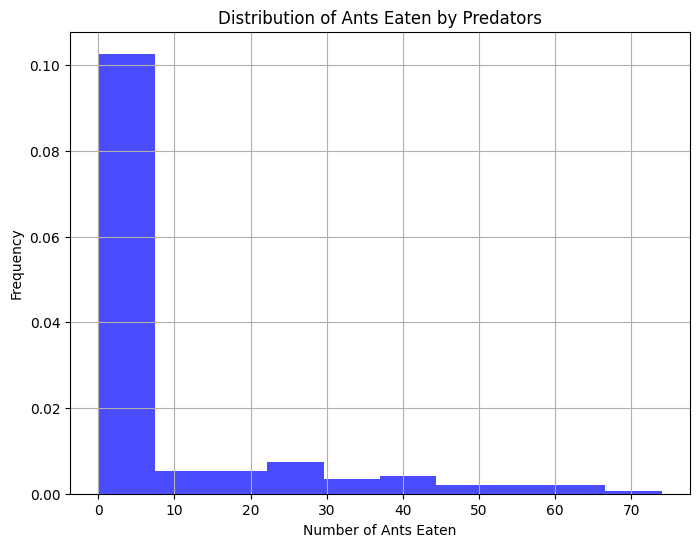

In [20]:
plt.figure(figsize=(8, 6))
plt.hist(ants_eaten_by_predator, bins=10, density=True, alpha=0.7, color='blue')
plt.title("Distribution of Ants Eaten by Predators")
plt.xlabel("Number of Ants Eaten")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [16]:
ants_eaten_by_predators

[44,
 0,
 2,
 1,
 0,
 0,
 3,
 3,
 38,
 0,
 1,
 0,
 1,
 3,
 3,
 1,
 70,
 0,
 0,
 3,
 0,
 4,
 54,
 31,
 0,
 0,
 1,
 1,
 7,
 0,
 6,
 13,
 1,
 3,
 2,
 2,
 22,
 7,
 0,
 1,
 4,
 5,
 0,
 2,
 0,
 58,
 4,
 3,
 3,
 1,
 1,
 1,
 1,
 46,
 2,
 3,
 1,
 0,
 7,
 30,
 6,
 1,
 0,
 5,
 35,
 0,
 15,
 1,
 1,
 34,
 1,
 3,
 3,
 2,
 9,
 0,
 0,
 24,
 29,
 12,
 0,
 9,
 1,
 2,
 0,
 1,
 1,
 1,
 26,
 6,
 50,
 1,
 0,
 0,
 0,
 1,
 4,
 0,
 0,
 35,
 0,
 1,
 2,
 8,
 1,
 60,
 0,
 0,
 6,
 0,
 0,
 0,
 49,
 0,
 2,
 47,
 0,
 1,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 48,
 32,
 1,
 1,
 16,
 34,
 0,
 1,
 2,
 0,
 2,
 27,
 0,
 13,
 57,
 2,
 2,
 1,
 3,
 0,
 1,
 0,
 6,
 5,
 13,
 13,
 3,
 1,
 1,
 0,
 44,
 0,
 39,
 4,
 3,
 0,
 11,
 9,
 0,
 22,
 3,
 2,
 32,
 5,
 1,
 14,
 5,
 7,
 2,
 0,
 23,
 0,
 4,
 1,
 2,
 4,
 6,
 0,
 5,
 0,
 7,
 0,
 0,
 44,
 0,
 27,
 0,
 0,
 18,
 1,
 3,
 1]

In [ ]:
# Fit a power law
results = powerlaw.Fit(ants_eaten_by_predators)

plt.figure(figsize=(8, 6))
results.plot_pdf(color='blue', linestyle='-', label='Empirical Data')
results.power_law.plot_pdf(color='red', linestyle='--', label='Power Law Fit')
plt.title("Power Law Fit of Ants Eaten Distribution")
plt.xlabel("Number of Ants Eaten")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

### Meal sizes

In [5]:
height = 50
width = 50
num_predators = 1

In [ ]:
model = AntWorld(height=height, width=width, num_predators=num_predators)
model.run_model()

for agent in model.schedule.agents:
    if isinstance(agent, Predator):
            meal_sizes = agent.meal_sizes

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(meal_sizes, bins=10, density=True, alpha=0.7, color='blue')
plt.title("Distribution of Meal Sizes")
plt.xlabel("Number of Ants Eaten")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
# Fit a power law
results = powerlaw.Fit(meal_sizes)

plt.figure(figsize=(8, 6))
results.plot_pdf(color='blue', linestyle='-', label='Empirical Data')
results.power_law.plot_pdf(color='red', linestyle='--', label='Power Law Fit')
plt.title("Power Law Fit of Ants Eaten Distribution")
plt.xlabel("Number of Ants Eaten")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()